# **Load all libraries**

In [0]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import style
import matplotlib.cm as cm
import sklearn
import sklearn.metrics
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
class Kmeans:
    def __init__(self,X,K,iteration):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        self.max_iteration = iteration
    
    def stopcondition(self,oldcentroid,iter):
      if iter > self.max_iteration: return True
      return np.array_equal(oldcentroid,self.Centroids)
        
    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,type):
        if type == 'random':
          for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]
        
        if type == 'kmeans++':
          self.Centroids=self.kmeanspp(self.X,self.K)

        iterations = 0
        oldCentroids = None

        while not self.stopcondition(oldCentroids, iterations):
            iterations += 1
            oldcentroid = self.Centroids
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(self.X.shape[1],0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        EuclidianDistance=np.array([]).reshape(self.m,0)
        for k in range(self.K):
          tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
          C=np.argmin(EuclidianDistance,axis=1)
        return self.Output,self.Centroids.T,C
    
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss

# **Load datasets**


### Create synthetic data using Scikit learn make_blob method
Number of features: 4
Number of clusters: 5
Number of samples: 200

In [0]:
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

data1 = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std)

d1 = data1[0]

df1=pd.DataFrame(data=d1,columns=['Feature_'+str(i) for i in range(1,n_features+1)])
X=df1
X = StandardScaler().fit_transform(X)


### Load shopping data.

About the data: 2 feature data with features annual income and spending score. 

In [21]:
linkwhite='https://drive.google.com/open?id=1UoA-0T5g72nczAMkeiezL_zwW6Lo87DN'
fluff, id2 = linkwhite.split('=')
print (id2)

downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('shopping-data.csv') 

dataset= pd.read_csv('shopping-data.csv')

print(dataset.describe())

X = StandardScaler().fit_transform(dataset.iloc[:, [3, 4]].values)

1UoA-0T5g72nczAMkeiezL_zwW6Lo87DN
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


### Load travel review data

In [7]:
linkwhite='https://drive.google.com/open?id=1UPOFZ5EMfaz5vpFmcwJAPzn7fhU6n2bu'
fluff, id2 = linkwhite.split('=')
print (id2)

downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('tripadvisor_review.csv') 

dataset= pd.read_csv('tripadvisor_review.csv')
print(dataset.describe())
X = StandardScaler().fit_transform(dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10]].values)

1UPOFZ5EMfaz5vpFmcwJAPzn7fhU6n2bu
       Category 1  Category 2  Category 3  ...  Category 8  Category 9  Category 10
count  980.000000  980.000000  980.000000  ...  980.000000  980.000000   980.000000
mean     0.893194    1.352612    1.013306  ...    2.835061    1.569439     2.799224
std      0.326912    0.478280    0.788607  ...    0.137505    0.364629     0.321380
min      0.340000    0.000000    0.130000  ...    2.420000    0.740000     2.140000
25%      0.670000    1.080000    0.270000  ...    2.740000    1.310000     2.540000
50%      0.830000    1.280000    0.820000  ...    2.820000    1.540000     2.780000
75%      1.020000    1.560000    1.572500  ...    2.910000    1.760000     3.040000
max      3.220000    3.640000    3.620000  ...    3.390000    3.170000     3.660000

[8 rows x 10 columns]


### Load wine data

15VXMwTjcOPKUw9yt0SVX84kUH5fnVoaU
       fixed acidity  volatile acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        6.854788          0.278241  ...    10.514267     5.877909
std         0.843868          0.100795  ...     1.230621     0.885639
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.300000          0.210000  ...     9.500000     5.000000
50%         6.800000          0.260000  ...    10.400000     6.000000
75%         7.300000          0.320000  ...    11.400000     6.000000
max        14.200000          1.100000  ...    14.200000     9.000000

[8 rows x 12 columns]


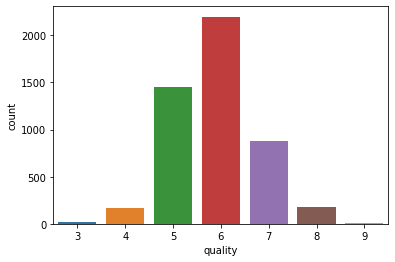

In [18]:
linkwhite='https://drive.google.com/open?id=15VXMwTjcOPKUw9yt0SVX84kUH5fnVoaU'
fluff, id2 = linkwhite.split('=')
print (id2)

downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('white_wine.csv') 

dataset= pd.read_csv('white_wine.csv')
print(dataset.describe())

sns.countplot(x='quality', data=dataset)

In [19]:
conditions = [
    (dataset['quality'] >= 7),
    (dataset['quality'] <= 4)
]
quality = [2, 0]
dataset['quality'] = np.select(conditions, quality, default=1)
dataset.quality.value_counts()

1    3655
2    1060
0     183
Name: quality, dtype: int64

(4898, 11)
[6.30e+00 3.00e-01 3.40e-01 1.60e+00 4.90e-02 1.40e+01 1.32e+02 9.94e-01
 3.30e+00 4.90e-01 9.50e+00 1.00e+00]
[1 1 1 ... 1 2 1]


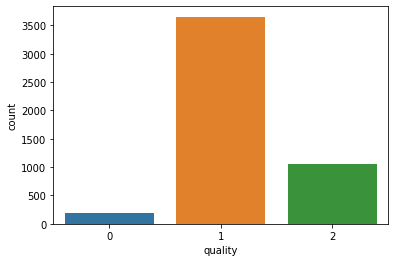

In [20]:
sns.countplot(x='quality', data=dataset)

X = dataset.drop(['quality'], axis=1)
X.head()
X = StandardScaler().fit_transform(X.iloc[:].values)
print(X.shape)
print(dataset.iloc[1,:].values)
Y = dataset['quality'].values
print(Y)

### Load Birch-sets
http://cs.joensuu.fi/~isido/clustering/

Synthetic 2-d data with 100 000 vectors and 100 clusters (*).

In [49]:
linkwhite='https://drive.google.com/open?id=1wT7wnuU4dB3FcD8Zl6wAZgpy6cvH_m6j'
fluff, id2 = linkwhite.split('=')
print (id2)

downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('birch1.txt') 

file1 = open('birch1.txt', 'r') 
Lines = file1.readlines() 


X = []
i=0
for line in Lines: 
  X.append(line.split())

X = np.array(X).astype(int)

1wT7wnuU4dB3FcD8Zl6wAZgpy6cvH_m6j


## K-means Clustering Algorithm

### Comparing initialization of centroids

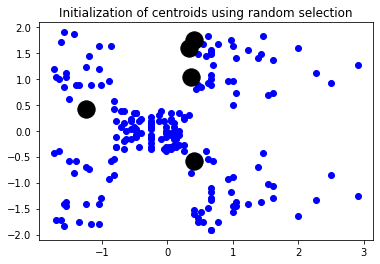

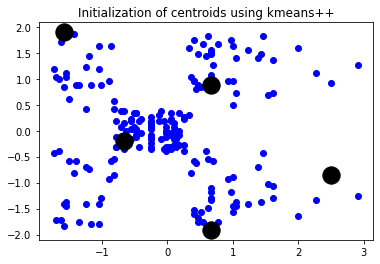

In [27]:
K=5
m=X.shape[0]

Centroids=np.array([]).reshape(X.shape[1],0)

for i in range(K):
  rand=rd.randint(0,m-1)
  Centroids=np.c_[Centroids,X[rand]]

Centroids = Centroids.T

color=['red','blue','green','cyan','purple']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.scatter(X[:,0],X[:,1],c='blue')
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='black')
plt.title("Initialization of centroids using random selection")
plt.show()

Centroids = Kmeans.kmeanspp(_,X,K).T

color=['red','blue','green','cyan','purple']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.scatter(X[:,0],X[:,1],c='blue')
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='black')
plt.title("Initialization of centroids using kmeans++")
plt.show()


### Finding the number of clusters required. 

Sum of squares of distances of every data point from its corresponding cluster centroid should be as minimum as possible which is called SSE (Cluster Sums of Squares)

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. i.e the point after which SSE doesn’t decrease more rapidly is the appropriate value of K.

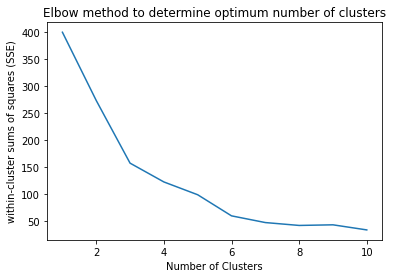

In [35]:
n_iter = 100

WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K,n_iter)
    kmeans.fit(type='kmeans++')
    Output,Centroids,labels =kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    #WCSS_array=np.append(WCSS_array,kmeans.WCSS())
    WCSS_array=np.append(WCSS_array,wcss)

K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (SSE)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

0.4201500415802002
[22 80 39 23 36]


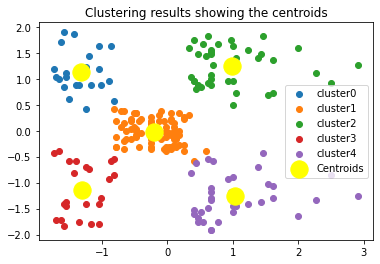

In [36]:
K=5
n_iter=100

start = time.time()
kmeans=Kmeans(X,K,n_iter)
kmeans.fit(type='kmeans++')
Output,Centroids,labels=kmeans.predict()
#labels = kmeans.labels()
end = time.time()
print(end - start)

unique_elements, counts_elements = np.unique(labels, return_counts=True)

print(counts_elements)


color=['red','blue','green','cyan','purple']

clusters = []

for i in range(K):
  clusters.append('cluster' + str(i))

for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],cmap=cm.cividis_r,label=clusters[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.title("Clustering results showing the centroids")
plt.legend()
plt.show()


# Hierarchical Agglomerative Clustering Algorithm

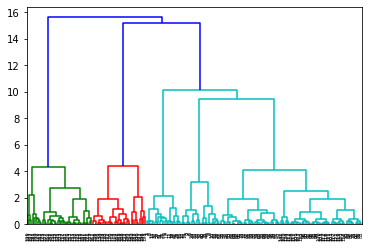

In [37]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [38]:
K=5
start = time.time()
model = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
end = time.time()
print(end - start)

unique_elements, counts_elements = np.unique(labels, return_counts=True)

print(counts_elements)

0.005462169647216797
[32 39 85 21 23]


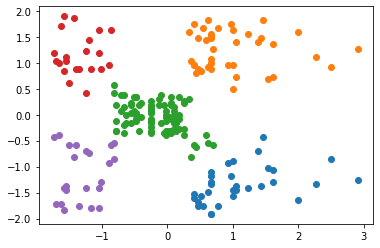

In [39]:
for k in range(K):
    plt.scatter(X[labels==k, 0], X[labels==k, 1],cmap="plasma")
plt.show()

# DBSCAN Clustering Algorithm


0.002201080322265625


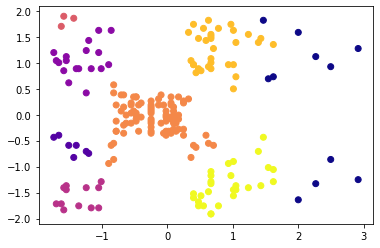

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
start = time.time()
dbscan = DBSCAN(eps=0.35, min_samples = 3)
labels = dbscan.fit_predict(X_scaled)
end = time.time()
print(end - start)

unique_elements, counts_elements = np.unique(labels, return_counts=True)

#print("Number of clusters: ", len(unique_elements))

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap="plasma")

# Gaussian mixture model EM Algorithm

[84 33 21 39 23]


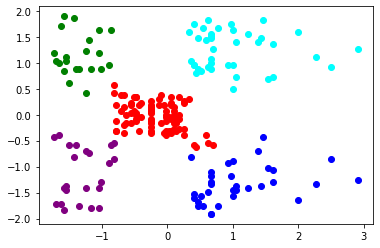

In [44]:
from sklearn.mixture import GaussianMixture

K=5

model = GaussianMixture(n_components=K, covariance_type='full')
output = model.fit(X)
labels = model.predict(X)

unique_elements, counts_elements = np.unique(labels, return_counts=True)

print(counts_elements)

for k in range(K):
    plt.scatter(X[labels==k, 0], X[labels==k, 1],c=color[k])
plt.show()

# Silhouette Analysis: Effectiveness of the clustering.

Silhouette analysis can be used to determine the degree of separation between clusters. For each sample:
Compute the average distance from all data points in the same cluster (ai).
Compute the average distance from all data points in the closest cluster (bi).
Compute the coefficient: (b1 - ai)/max(ai-bi)

The coefficient can take values in the interval [-1, 1].
1. If it is 0 –> the sample is very close to the neighboring clusters.
2. It it is 1 –> the sample is far away from the neighboring clusters.
3. It it is -1 –> the sample is assigned to the wrong clusters.

Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters. We’ll use here geyser dataset again because its cheaper to run the silhouette analysis and it is actually obvious that there is most likely only two groups of data points.

Good n_clusters will have a well above 0.5 silhouette average score as well as all of the clusters have higher than the average score

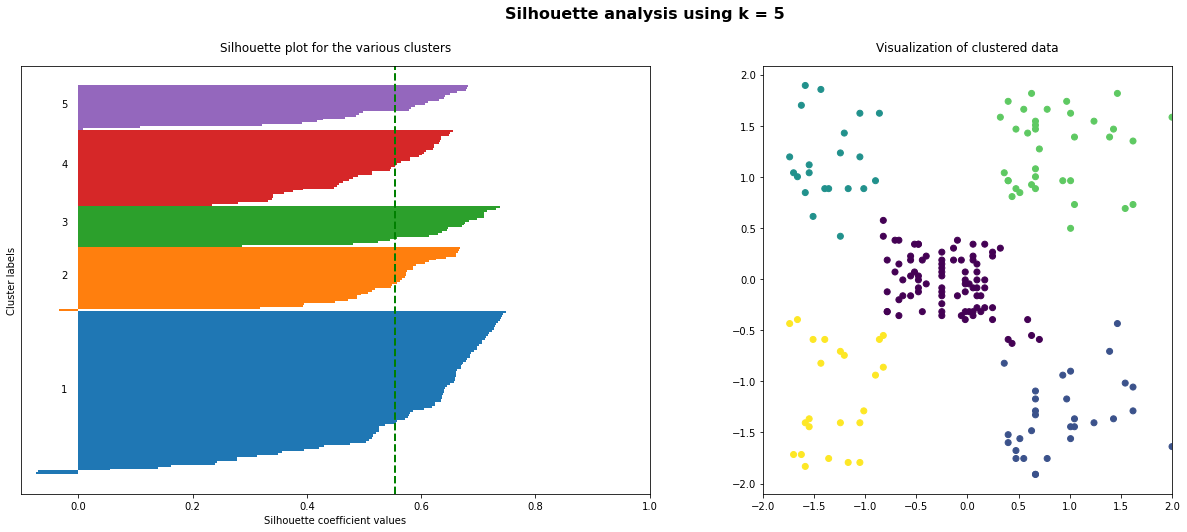

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Get silhouette samples
silhouette_vals = silhouette_samples(X, labels)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);

# Scatter plot of data colored with labels
ax2.scatter(X[:, 0], X[:, 1], c=labels)
#ax2.scatter(Centroids[:, 0], Centroids[:, 1], s=300, c='black')
ax2.set_xlim([-2, 2])
ax2.set_xlim([-2, 2])
ax2.set_title('Visualization of clustered data', y=1.02)
ax2.set_aspect('equal')
plt.tight_layout()
plt.suptitle(f'Silhouette analysis using k = {K}',
              fontsize=16, fontweight='semibold', y=1.05);

### Kmeans on Brich dataset (large dataset)

In [50]:
K=100
n_iter=3


start = time.time()
kmeans=Kmeans(X,K,n_iter)
kmeans.fit(type='kmeans++')
Output,Centroids,labels=kmeans.predict()
#labels = kmeans.labels()
end = time.time()
print(end - start)

unique_elements, counts_elements = np.unique(labels, return_counts=True)

print(counts_elements)


854.7744514942169
[ 654 1023  537  841  367 1991 1583  958  279 1036 1148  725  988 1118
 1042 1355 1131 1174 1157  428  876  631 1077  516  649 1296 2049  631
 1972 1040  557  604  908  556 1126  785  866 1099  680  877  472  827
 1059  880  853  367 1573  529  458 1431 1154 1190  489  534  504  928
  865 1397 1545  971  969 1958 1049 1097 1554  851  919 1126  733 1643
  686 1501 1240 1300 1029 1999  638  242  957  381 1731  385  637  554
 1881 1002 1126  666 1151  889  689 1439 1407 1001  511 1210 1743 1507
  625 1618]


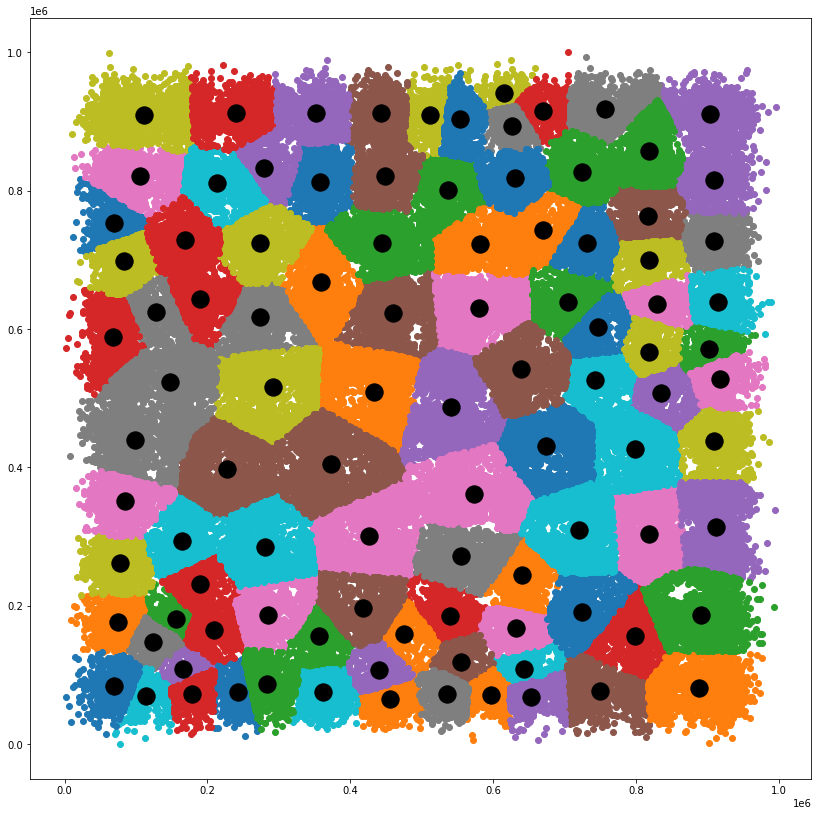

In [51]:
labels = []

for i in range(K):
  labels.append('cluster' + str(i))

plt.figure(figsize=(14,14))
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],cmap=cm.cividis_r,label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='black',label='Centroids')
plt.show()

### Accuracy check for wine data only

In [203]:
Y_pred = np.array(labels)
shape = Y.shape
Y_pred = Y_pred.reshape(shape)
number_of_equal_elements = np.sum(Y_pred==Y)
total_elements = len(Y)
percentage = 100 - number_of_equal_elements/total_elements*100
print("Acccuary: ",percentage)

Acccuary:  83.7893017558187
